In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from  matplotlib import pyplot as plt, patches
from matplotlib import cm, colors
import lzma, pickle
import scipy

load_dir = '../Data/'
save_dir = "../Plots/"

### Setting: 

- Graph: 3-RRG, $N=10000$
- Model: Step-dSIR model
- Observation type: Sensors

In [3]:
graph=r"rrg"
d=3
N=10000

g_s = r"graph_type"
d_s = r"$d$"
N_s = r"$N$"
i_s = r"init"
D_s = r"$\Delta$"

r_s = r"$\rho$"
l_s = r"$\lambda$"
del_s = r"$\delta$"

o0t_s = r"$\widetilde{O}_{t=0}$"
mo0t_s = r"$\widetilde{MO}_{t=0}$"
do0t_s = r"$\widetilde{\delta O}_{t=0}$"

Rse_s = r"$R_{SE}$"
Rmse_s = r"$R_{MSE}$"
dRse_s = r"$\delta R_{SE}$"

dse_s = r"$\delta SE$"
do0_s = r"$\delta O_{t=0}$"

# Nishimori

Import data frame

In [4]:
file_name = "Fig2.xz"
with lzma.open(load_dir + file_name, "rb") as f:
    data_frame = pickle.load(f)

data_frame = data_frame[(data_frame["o_type"]=="rho") & (data_frame["s_type"]=="delta")]
data_frame[r_s] = data_frame["M"]
data_frame[del_s] = data_frame["S"]

In [5]:
df = data_frame[((data_frame[i_s]=="rnd") )]

In [6]:
data_frame.iloc[:,:15]

,init,graph_type,$N$,$d$,$\lambda$,s_type,S,o_type,M,iter_space,seed,tol,n_iter,obs_type,snap_time
0,rnd,rrg,100000,3,0.8,delta,0.1,rho,0.85,100,50,0.000001,100,sensors,-1
1,inf,rrg,100000,3,0.8,delta,0.1,rho,0.85,100,50,0.000001,100,sensors,-1
2,rnd,rrg,10000,3,0.8,delta,0.1,rho,0.65,100,24,0.000001,100,sensors,-1
3,inf,rrg,10000,3,0.8,delta,0.1,rho,0.65,100,24,0.000001,100,sensors,-1
4,rnd,rrg,1000,3,0.8,delta,0.1,rho,0.30,100,19,0.000001,100,sensors,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6295,inf,rrg,1000,3,0.8,delta,0.1,rho,0.15,100,34,0.000001,100,sensors,-1
6296,rnd,rrg,1000,3,0.8,delta,0.1,rho,0.90,100,27,0.000001,100,sensors,-1
6297,inf,rrg,1000,3,0.8,delta,0.1,rho,0.90,100,27,0.000001,100,sensors,-1
6298,rnd,rrg,100000,3,0.8,delta,0.1,rho,0.60,100,33,0.000001,100,sensors,-1


<Axes: xlabel='$\\rho$', ylabel='$\\widetilde{\\delta O}_{t=0}$'>

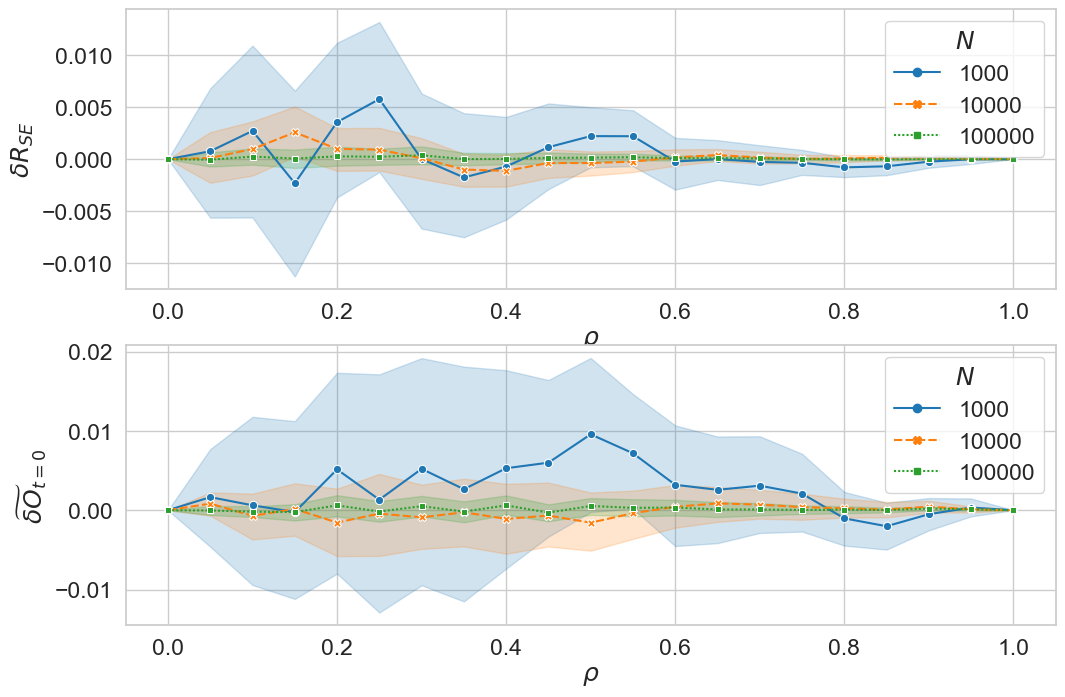

In [7]:
sns.set_theme(style="whitegrid", font_scale=1.5)
fig,ax = plt.subplots(2,1, figsize=(12,8))
sns.lineplot(data = df, x = r_s, y= dRse_s, markers=True, ax=ax[0], hue=N_s, style=N_s, palette="tab10")#,ci=0)
sns.lineplot(data = df, x = r_s, y= do0t_s, markers=True, ax=ax[1], hue=N_s, style=N_s, palette="tab10")#,ci=0)

# RND vs INF

In [35]:
file_name = "Fig2_IT.xz"
with lzma.open(load_dir + file_name, "rb") as f:
    data_frame_it = pickle.load(f)

In [36]:
df_it_inf = data_frame_it[(data_frame_it["seed"]<7) & (data_frame_it["init"]=="inf")][[Rmse_s,mo0t_s,"seed","init","iteration"]]
df_it_rnd = data_frame_it[(data_frame_it["seed"]<7) & (data_frame_it["init"]=="rnd")][[Rmse_s,mo0t_s,"seed","init","iteration"]]

In [37]:
o0t_rnd_s = r"$\widetilde{\rm O}^{\rm rnd}_{t=0}$"
o0t_inf_s = r"$\widetilde{\rm O}^{\rm inf}_{t=0}$"
se_rnd_s = r"$R^{\rm rnd}_{\rm SE}$"
se_inf_s = r"$R^{\rm inf}_{\rm SE}$"

ov_diff_s = r"$\widetilde{\rm O}^{\rm inf}_{t=0}-\widetilde{\rm O}^{\rm rnd}_{t=0}$"
se_diff_s = r"$R^{\rm inf}_{\rm SE}-R^{\rm rnd}_{\rm SE}$"

In [38]:
o0t_rnd_s = r"$\widetilde{\rm MO}^{\rm rnd}_{t=0}$"
o0t_inf_s = r"$\widetilde{\rm MO}^{\rm inf}_{t=0}$"
se_rnd_s = r"$R^{\rm rnd}_{\rm MSE}$"
se_inf_s = r"$R^{\rm inf}_{\rm MSE}$"

ov_diff_s = r"$\widetilde{\rm MO}^{\rm inf}_{t=0}-\widetilde{\rm MO}^{\rm rnd}_{t=0}$"
se_diff_s = r"$R^{\rm inf}_{\rm MSE}-R^{\rm rnd}_{\rm MSE}$"

In [39]:
#DATA MANIPULATION
seed_list = [1,2,3,4,5,6]
it_list = np.sort(data_frame_it["iteration"].unique())

len_seed = len(seed_list)
len_it = len(it_list)

ov_inf_tab = np.zeros((len_seed, len_it))
ov_rnd_tab = np.zeros((len_seed, len_it))
se_inf_tab = np.zeros((len_seed, len_it))
se_rnd_tab = np.zeros((len_seed, len_it))
seed_tab = np.zeros((len_seed, len_it))
it_tab = np.zeros((len_seed, len_it))

for i_s,seed in enumerate(seed_list):
    for i_it,it in enumerate(it_list):
        if (df_it_inf[ (df_it_inf["seed"]==seed) & (df_it_inf["iteration"]==it)][mo0t_s].values.any()):
            ov_inf_tab[i_s][i_it] = df_it_inf[ (df_it_inf["seed"]==seed) & (df_it_inf["iteration"]==it)][mo0t_s].values[0]
            se_inf_tab[i_s][i_it] = df_it_inf[ (df_it_inf["seed"]==seed) & (df_it_inf["iteration"]==it)][Rmse_s].values[0]
        else:
            ov_inf_tab[i_s][i_it] = ov_inf_tab[i_s][i_it-1]
            se_inf_tab[i_s][i_it] = se_inf_tab[i_s][i_it-1]
        if (df_it_rnd[ (df_it_rnd["seed"]==seed) & (df_it_rnd["iteration"]==it)][mo0t_s].values.any()):
            ov_rnd_tab[i_s][i_it] = df_it_rnd[ (df_it_rnd["seed"]==seed) & (df_it_rnd["iteration"]==it)][mo0t_s].values[0]
            se_rnd_tab[i_s][i_it] = df_it_rnd[ (df_it_rnd["seed"]==seed) & (df_it_rnd["iteration"]==it)][Rmse_s].values[0]
        else:
            ov_rnd_tab[i_s][i_it] = ov_rnd_tab[i_s][i_it-1]
            se_rnd_tab[i_s][i_it] = se_rnd_tab[i_s][i_it-1]
        seed_tab[i_s][i_it] = seed
        it_tab[i_s][i_it] = it
df_joint = pd.DataFrame({"seed":seed_tab.flatten(),"iteration":it_tab.flatten(),o0t_rnd_s:ov_rnd_tab.flatten(),o0t_inf_s:ov_inf_tab.flatten(),se_rnd_s:se_rnd_tab.flatten(),se_inf_s:se_inf_tab.flatten(),ov_diff_s:ov_inf_tab.flatten() - ov_rnd_tab.flatten(),se_diff_s:se_inf_tab.flatten() - se_rnd_tab.flatten()})
#df_D_lam_list = [[],[]]
#for i,Delta in enumerate(D_list):
#    for lam in l_list:

#        df_D_lam_list[i].append( df_flat[ (df_flat[l_s]==lam) & (df_flat[D_s]==Delta)].drop(D_s,axis=1).drop(l_s,axis=1).dropna(axis=0) )

In [40]:
df_joint

,seed,iteration,$\widetilde{\rm MO}^{\rm rnd}_{t=0}$,$\widetilde{\rm MO}^{\rm inf}_{t=0}$,$R^{\rm rnd}_{\rm MSE}$,$R^{\rm inf}_{\rm MSE}$,$\widetilde{\rm MO}^{\rm inf}_{t=0}-\widetilde{\rm MO}^{\rm rnd}_{t=0}$,$R^{\rm inf}_{\rm MSE}-R^{\rm rnd}_{\rm MSE}$
0,1.0,0.0,0.000000,1.000000,0.000000,0.999998,1.000000,0.999998
1,1.0,1.0,0.214655,0.921941,0.279994,0.936337,0.707286,0.656344
2,1.0,2.0,0.242314,0.804734,0.386523,0.885993,0.562419,0.499470
3,1.0,3.0,0.283054,0.683717,0.464377,0.821703,0.400663,0.357326
4,1.0,4.0,0.306348,0.604804,0.498380,0.768343,0.298457,0.269964
...,...,...,...,...,...,...,...,...
271,6.0,41.0,0.371643,0.371653,0.590636,0.590632,0.000010,-0.000004
272,6.0,42.0,0.371643,0.371654,0.590636,0.590633,0.000011,-0.000003
273,6.0,43.0,0.371643,0.371655,0.590636,0.590634,0.000012,-0.000003
274,6.0,44.0,0.371643,0.371655,0.590636,0.590634,0.000012,-0.000002


(-0.0001, 1.1)

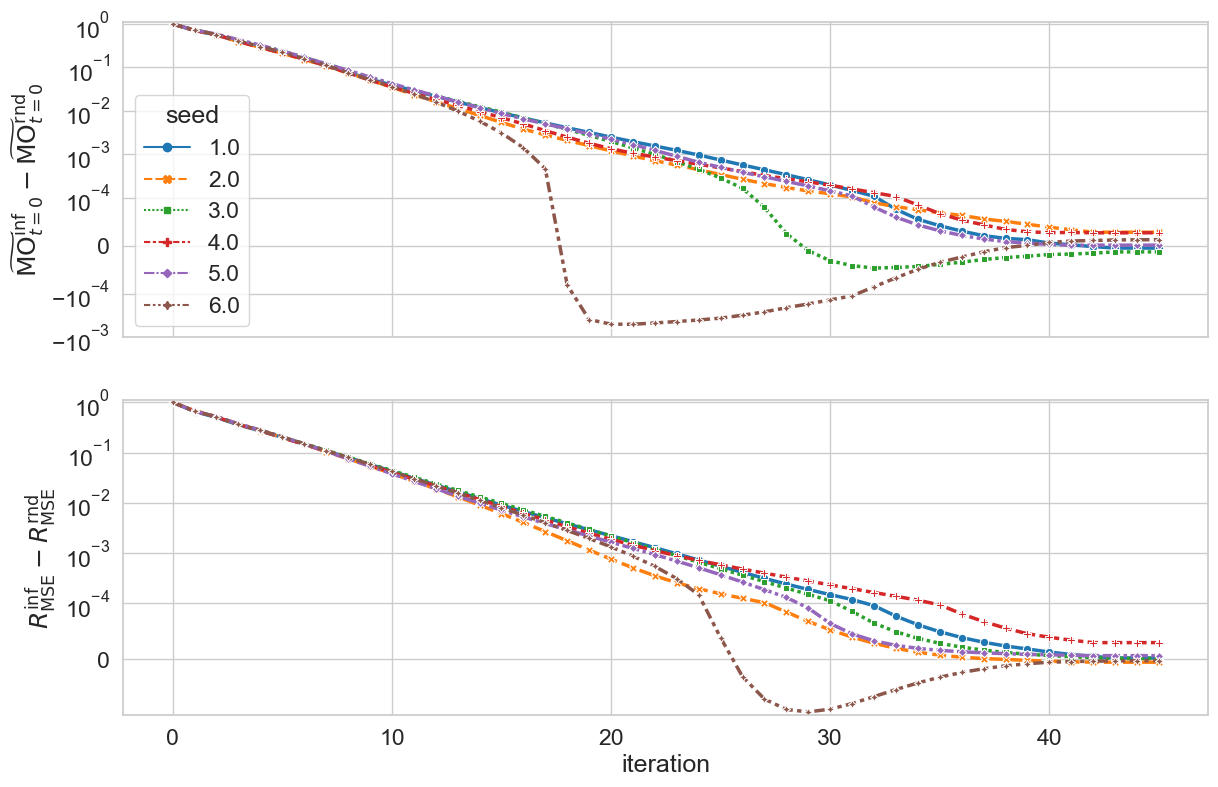

In [41]:
lw=2.5
sns.set_theme(style="whitegrid", font_scale=1.5)
fig,ax = plt.subplots(2,1, figsize=(14,9), sharex=True)
#plt.suptitle(f"{graph}, $N=10000$, $d={d}$, init=rnd, $f_I(T)=1$")
sns.lineplot(data = df_joint, x = "iteration", y= ov_diff_s, markers=True, ax=ax[0], hue="seed", style="seed",palette="tab10",linewidth = lw)
sns.lineplot(data = df_joint, x = "iteration", y= se_diff_s, markers=True, ax=ax[1], hue="seed", style="seed", palette="tab10",legend=False,linewidth = lw)
ax[0].set_yscale("symlog", linthresh=1e-4)
ax[0].set_ylim([-1e-3,1.1])
ax[1].set_yscale("symlog", linthresh=0.0001)
ax[1].set_ylim([-1e-4,1.1])
#fig.savefig(save_dir + f"Prova2.pdf")

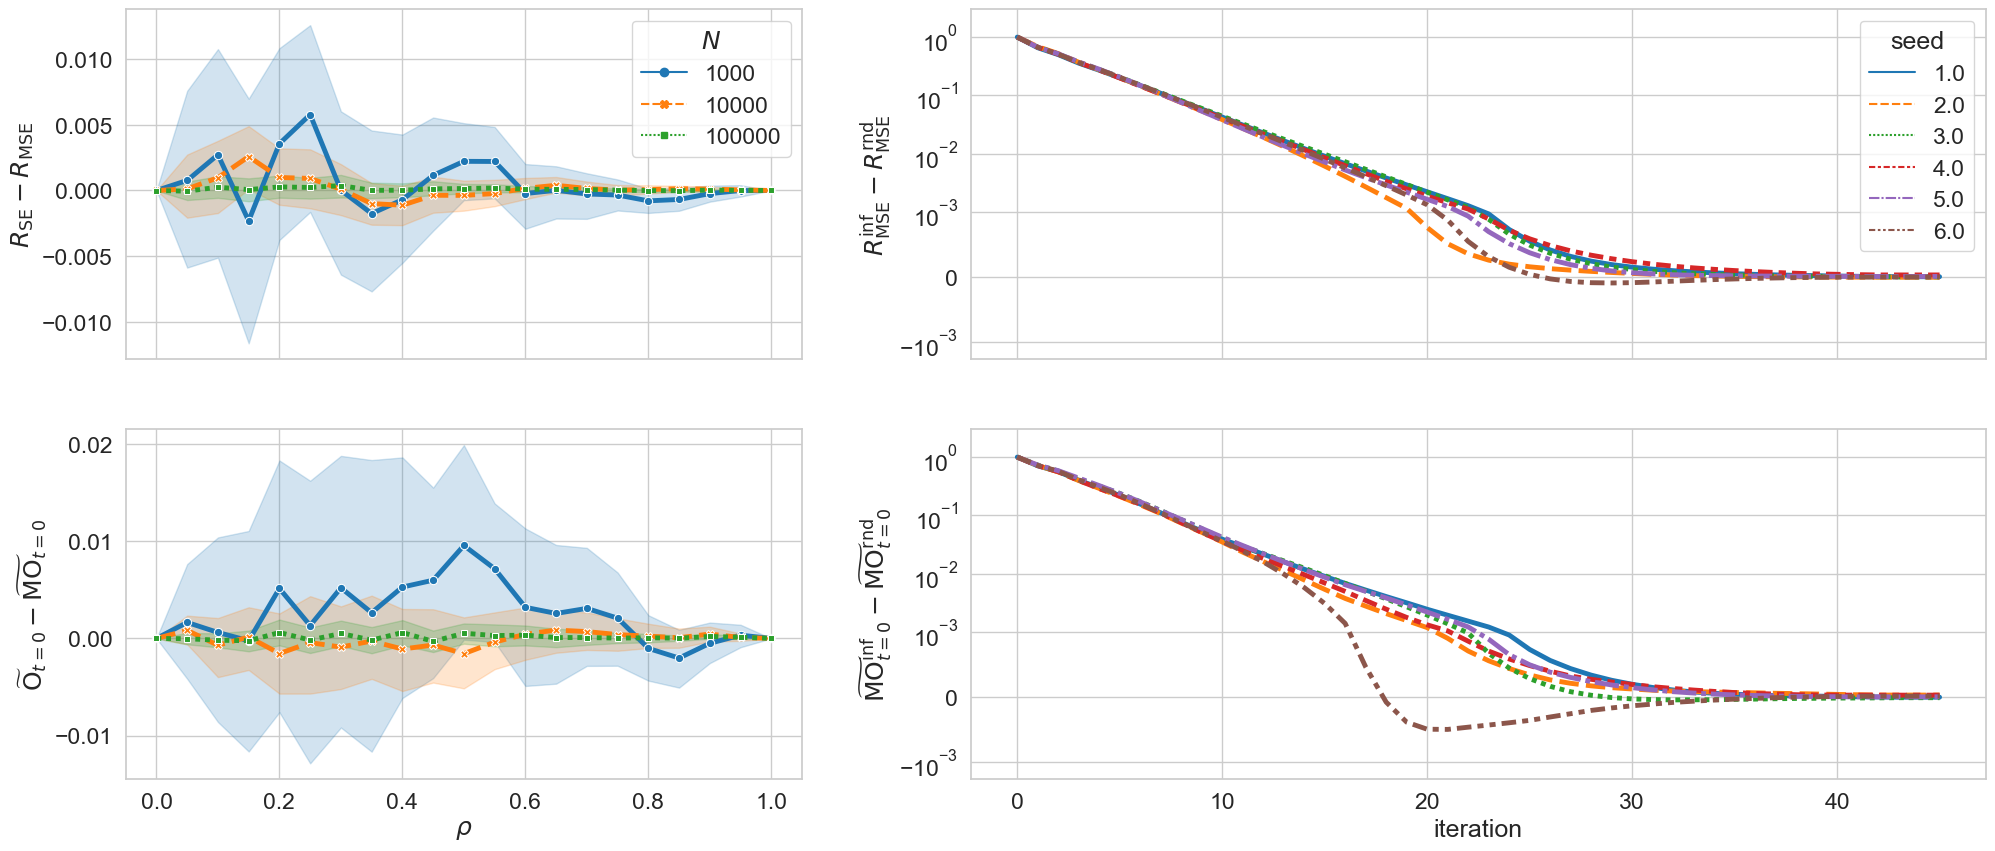

In [42]:
lw=3.5
sns.set_theme(style="whitegrid", font_scale=1.5)
fig,ax = plt.subplots(2,2, figsize=(24,10),sharex="col", gridspec_kw={'width_ratios': [1, 1.5]})
#plt.suptitle(f"{graph}, $N=10000$, $d={d}$, init=rnd, $f_I(T)=1$")
sns.lineplot(data = df, x = r_s, y= dRse_s, markers=True, ax=ax[0][0], hue=N_s, style=N_s, palette="tab10",linewidth = lw)#,ci=0)
sns.lineplot(data = df, x = r_s, y= do0t_s, markers=True, ax=ax[1][0], hue=N_s, style=N_s, palette="tab10",legend=False,linewidth = lw)#,ci=0)
lw=3.5
sns.lineplot(data = df_joint, x = "iteration", y= se_diff_s, markers=False, ax=ax[0][1], hue="seed", style="seed", palette="tab10",linewidth = lw)
sns.lineplot(data = df_joint, x = "iteration", y= ov_diff_s, markers=False, ax=ax[1][1], hue="seed", style="seed",palette="tab10",legend=False,linewidth = lw)
ax[0][0].set_ylabel(r"$R_{\rm SE}-R_{\rm MSE}$")
ax[1][0].set_ylabel(r"$\widetilde{\rm O}_{t=0}-\widetilde{\rm MO}_{t=0}$")
ax[0][1].set_yscale("symlog", linthresh=1e-3)
ax[0][1].set_ylim([-2*1e-3,3.])
ax[1][1].set_yscale("symlog", linthresh=1e-3)
ax[1][1].set_ylim([-2*1e-3,3.])
#ax2 = plt.twinx()
#ax.set_ylim([0.,1])
#ax2.set_ylim([0.,1])
#sns.lineplot(data = df, x = r_s, y=mo0t_s, markers=True, ax=ax, hue=l_s, palette="tab10")
#ax.legend()
#ax.set_xscale("log")
fig.savefig(save_dir + f"Figure2.pdf")